In [31]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
matplotlib.rc('font', family = font_name)

seoul_area = gpd.GeoDataFrame.from_file('data/LARD_ADM_SECT_SGG_11.shp', encoding='cp949')

c:\Users\dlagh\anaconda3\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
c:\Users\dlagh\anaconda3\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  aout[:] = out


In [32]:
geo_data = 'data/older_seoul.geojson'
geo_data
import geopandas as gpd

df = gpd.read_file(geo_data)
df.head()

,시,구,동,행정동코드,인구,남자,여자,geometry
0,서울특별시,종로구,사직동,11110530,9700,4375,5325,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ..."
1,서울특별시,종로구,삼청동,11110540,3013,1443,1570,"MULTIPOLYGON (((126.98269 37.59507, 126.98337 ..."
2,서울특별시,종로구,부암동,11110550,10525,5002,5523,"MULTIPOLYGON (((126.97585 37.59656, 126.97359 ..."
3,서울특별시,종로구,평창동,11110560,18830,8817,10013,"MULTIPOLYGON (((126.97507 37.63139, 126.97649 ..."
4,서울특별시,종로구,무악동,11110570,8745,4078,4667,"MULTIPOLYGON (((126.96067 37.58080, 126.96281 ..."


In [33]:
gdf_exploded=df.explode()
gdf_exploded=gdf_exploded[gdf_exploded['구'].isin(['종로구','중구'])]
gdf_exploded = gdf_exploded.to_crs({'init':'epsg:5179'})

In [34]:
police=pd.read_csv("data/서울파출소_지구대_좌표.csv")
police=police[police['구명'].isin(['종로구','중구'])]
police['geometry'] = police.apply(lambda row : Point([row['lng'], row['lat']]), axis=1)
police = gpd.GeoDataFrame(police, geometry='geometry')
police.crs = {'init':'epsg:4326'}
police = police.to_crs({'init':'epsg:5179'})

c:\Users\dlagh\anaconda3\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
c:\Users\dlagh\anaconda3\lib\site-packages\geopandas\plotting.py:171: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  segments = [np.array(linestring)[:, :2] for linestring in geoms]


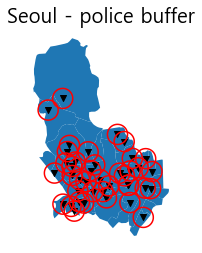

In [35]:
buf_poly = gpd.GeoDataFrame({'geometry': police.buffer(500)}) #1km
origin_ = gdf_exploded.groupby(['동']).apply(lambda x : x.area.sum())
ax = gdf_exploded['geometry'].plot()
police.plot(ax=ax, marker='v', color='black', label='police')
buf_poly.boundary.plot(ax=ax, color='red')
ax.set_title("Seoul - police buffer", fontsize=20)
ax.set_axis_off()
plt.show()
#print(origin_)

In [36]:
cctv=pd.read_csv('data/서울시CCTV좌표.csv')
cctv = cctv[['구명','법정동명','CCTV수량','lat','lng']]
cctv=cctv[cctv['구명'].isin(['종로구','중구'])]
cctv['geometry'] = cctv.apply(lambda row : Point([row['lng'], row['lat']]), axis=1)
cctv = gpd.GeoDataFrame(cctv, geometry='geometry')
cctv.crs = {'init':'epsg:4326'}
cctv = cctv.to_crs({'init':'epsg:5179'})

c:\Users\dlagh\anaconda3\lib\site-packages\descartes\patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
c:\Users\dlagh\anaconda3\lib\site-packages\geopandas\plotting.py:171: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  segments = [np.array(linestring)[:, :2] for linestring in geoms]


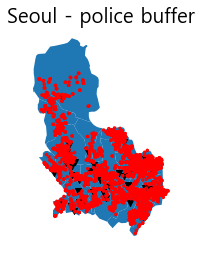

In [37]:
buf_poly2 = gpd.GeoDataFrame({'geometry': cctv.buffer(50)}) #1km
origin_ = gdf_exploded.groupby(['동']).apply(lambda x : x.area.sum())
ax = gdf_exploded['geometry'].plot()
police.plot(ax=ax, marker='v', color='black', label='police')
buf_poly2.boundary.plot(ax=ax, color='red')
ax.set_title("Seoul - police buffer", fontsize=20)
ax.set_axis_off()
plt.show()
#print(origin_)

In [38]:
buf_poly3=pd.concat([buf_poly,buf_poly2])

c:\Users\dlagh\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1589: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
c:\Users\dlagh\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1589: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  result[:] = values
c:\Users\dlagh\anaconda3\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
c:\Users\dlagh\anaconda3\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: Iterat

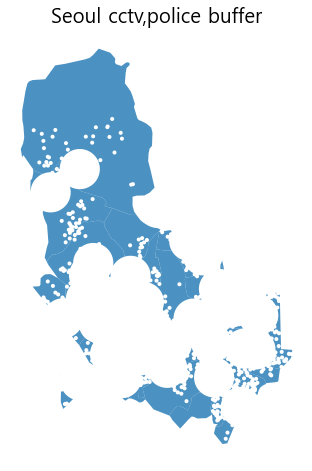

전체 대비 미커버지역 비율
동
평창동            90.0
무악동            69.0
삼청동            66.0
부암동            56.0
필동             51.0
장충동            48.0
동화동            46.0
가회동            44.0
청운효자동          39.0
종로1.2.3.4가동    34.0
약수동            31.0
청구동            29.0
신당5동           28.0
황학동            26.0
이화동            24.0
다산동            23.0
혜화동            15.0
교남동            14.0
숭인2동           13.0
중림동            12.0
dtype: float64


In [39]:
dif_area = gpd.overlay(gdf_exploded, buf_poly3, how='difference')
dif_area = dif_area.dissolve(by='동')
ax = dif_area.plot(figsize=(8,8), alpha=0.8)
ax.set_title("Seoul cctv,police buffer", fontsize=20)
ax.set_axis_off()
plt.show()
rate=round(dif_area.area / origin_ * 100)
rate=rate.sort_values(ascending=False)
print("전체 대비 미커버지역 비율")
print(rate.head(20))